# Brazilian Inflation Analysis (IPCA)
## Period: 2010 - 2026

###  Project Overview
This project performs an exploratory and visual analysis of the **IPCA (Broad Consumer Price Index)**, Brazil's official inflation gauge produced by IBGE. The goal is to identify economic cycles, price shocks, and the index's behavior relative to the inflation targets set by the Central Bank of Brazil.

###  Technical Skills Applied
* **Data Wrangling:** Cleaning raw data from complex spreadsheets, handling missing values (NaN), and time-series manipulation.
* **Statistical Analysis:** Identification of inflationary peaks (outliers) and deflationary periods.
* **Data Visualization:** Creating professional charts using `Matplotlib` and `Seaborn` to communicate macroeconomic insights.

###  Key Indicators Analyzed
1.  **Monthly Variation:** Short-term fluctuations and immediate shocks.
2.  **12-Month Accumulated:** Trend analysis and adherence to official inflation targets.
3.  **Annual Historical Series:** Consolidated comparison by calendar year.

---

In [2]:

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import os


In [3]:
df = pd.read_excel("../data/ipca_raw.xls")

In [4]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,SÉRIE HISTÓRICA DO IPCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(continua)
2,NaN,NaN,NaN,NaN,NaN,VARIAÇÃO,NaN,NaN
3,ANO,MÊS,NÚMERO ÍNDICE,(%),NaN,NaN,NaN,NaN
4,NaN,NaN,(DEZ 93 = 100),NO,3,6,NO,12


In [5]:
df.head(15)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,SÉRIE HISTÓRICA DO IPCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(continua)
2,NaN,NaN,NaN,NaN,NaN,VARIAÇÃO,NaN,NaN
3,ANO,MÊS,NÚMERO ÍNDICE,(%),NaN,NaN,NaN,NaN
4,NaN,NaN,(DEZ 93 = 100),NO,3,6,NO,12
5,NaN,NaN,NaN,MÊS,MESES,MESES,ANO,MESES
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1994,JAN,141.31,41.31,162.13,533.33,41.31,2693.84
8,NaN,FEV,198.22,40.27,171.24,568.17,98.22,3035.71
9,NaN,MAR,282.96,42.75,182.96,602.93,182.96,3417.39


In [6]:
df = pd.read_excel('../Data/ipca_raw.xls', skiprows=7)

In [7]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,1994,JAN,141.31,41.31,162.13,533.33,41.31,2693.84
1,NaN,FEV,198.22,40.27,171.24,568.17,98.22,3035.71
2,NaN,MAR,282.96,42.75,182.96,602.93,182.96,3417.39
3,NaN,ABR,403.73,42.68,185.71,648.92,303.73,3828.49
4,NaN,MAI,581.49,44.03,193.36,695.71,481.49,4331.19


In [8]:
df.columns = [
    'ano', 'mes', 'indice_numero', 'var_mensal_pct', 
    'var_3_meses', 'var_6_meses', 'var_ano', 'var_12_meses'
]

In [9]:
df['ano'] = df['ano'].ffill()

In [10]:

df.columns = [
    'ano', 'mes', 'indice_numero', 'var_mensal_pct', 
    'var_3_meses', 'var_6_meses', 'var_ano', 'var_12_meses'
]


df['ano'] = pd.to_numeric(df['ano'], errors='coerce')
df['ano'] = df['ano'].ffill()


meses_map = {
    'JAN': 1, 'FEV': 2, 'MAR': 3, 'ABR': 4, 'MAI': 5, 'JUN': 6,
    'JUL': 7, 'AGO': 8, 'SET': 9, 'OUT': 10, 'NOV': 11, 'DEZ': 12
}


df['mes_num'] = df['mes'].str.strip().str.upper().map(meses_map)


df['data'] = pd.to_datetime(df[['ano', 'mes_num']].rename(columns={'ano': 'year', 'mes_num': 'month'}).assign(day=1), errors='coerce')


df_analise = df[df['data'] >= '2010-01-01'].copy()
df_analise = df_analise.dropna(subset=['data', 'var_mensal_pct'])


df_analise['var_mensal_pct'] = pd.to_numeric(df_analise['var_mensal_pct'], errors='coerce')

print(f"Sucesso! Dados prontos de {df_analise['data'].min().date()} até {df_analise['data'].max().date()}")
df_analise.head()

Sucesso! Dados prontos de 2010-01-01 até 2025-12-01


,ano,mes,indice_numero,var_mensal_pct,var_3_meses,var_6_meses,var_ano,var_12_meses,mes_num,data
232,2010.0,JAN,3040.22,0.75,1.54,2.22,0.75,4.59,1.0,2010-01-01
233,2010.0,FEV,3063.93,0.78,1.91,2.86,1.54,4.83,2.0,2010-02-01
234,2010.0,MAR,3079.86,0.52,2.06,3.15,2.06,5.17,3.0,2010-03-01
235,2010.0,ABR,3097.42,0.57,1.88,3.45,2.65,5.26,4.0,2010-04-01
236,2010.0,MAI,3110.74,0.43,1.53,3.47,3.09,5.22,5.0,2010-05-01


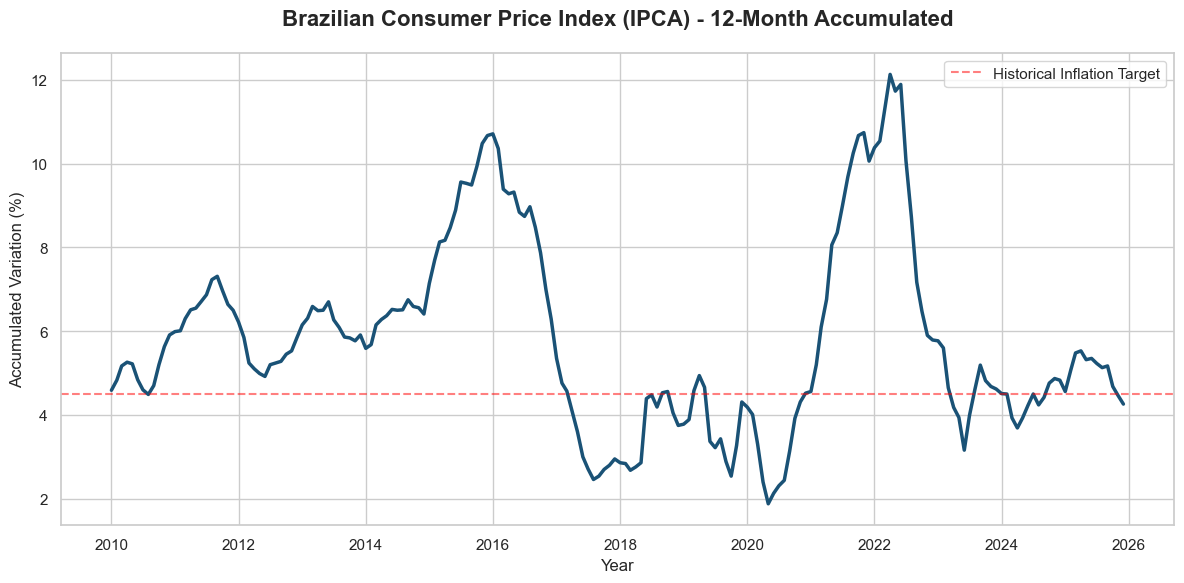

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))


sns.lineplot(data=df_analise, x='data', y='var_12_meses', color='#1a5276', linewidth=2.5)


plt.title('Brazilian Consumer Price Index (IPCA) - 12-Month Accumulated', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Accumulated Variation (%)', fontsize=12)


plt.axhline(y=4.5, color='red', linestyle='--', alpha=0.5, label='Historical Inflation Target')
plt.legend()

plt.tight_layout()
plt.savefig('../Figures/inflation_history_line.png', dpi=300, bbox_inches='tight')
plt.show()

##  Macroeconomic Perspective: 12-Month Accumulated IPCA
This visualization tracks the IPCA relative to the **Inflation Targeting Framework** managed by the Central Bank of Brazil (BCB). 

* **Monetary Policy Transmission:** The fluctuations reflect the lagged effects of the SELIC rate (the basic interest rate) on the real economy. 
* **Managed vs. Free Prices:** The peaks in **2015** illustrate a sharp correction in **administered prices** (electricity and fuels) and a major exchange rate devaluation. 
* **Supply-Side Shocks:** The **2021-2022** surge exemplifies a global supply-side shock, where cost-push inflation was driven by commodity prices and global supply chain disruptions, forcing a proactive monetary tightening cycle.

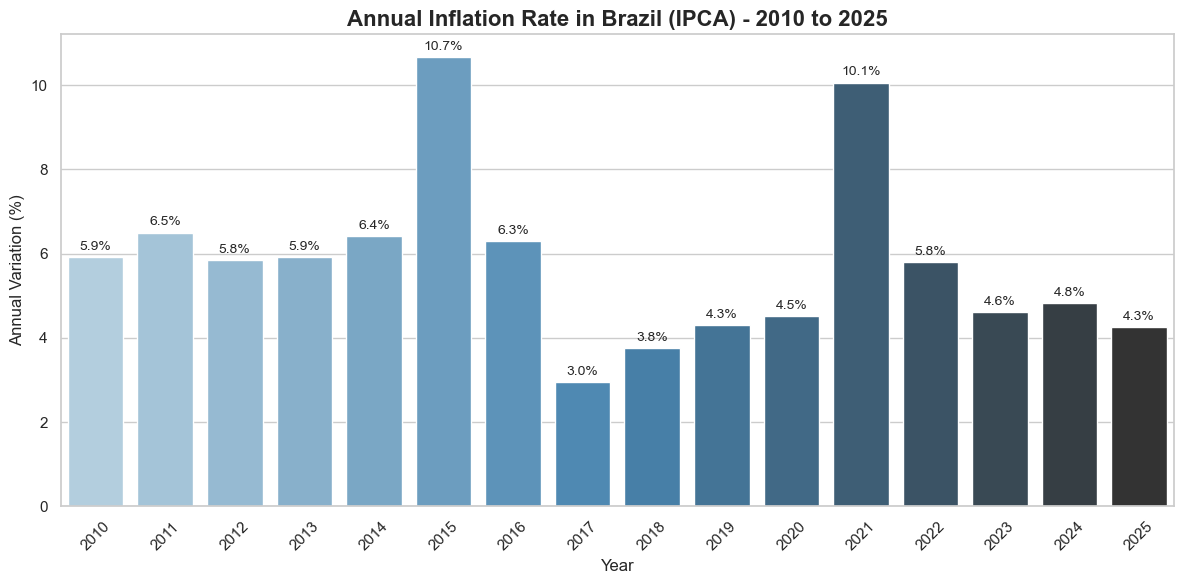

In [12]:


annual_data = df_analise.groupby('ano')['var_ano'].last().reset_index()


annual_data['ano'] = annual_data['ano'].astype(int)


plt.figure(figsize=(12, 6))


sns.barplot(data=annual_data, x='ano', y='var_ano', hue='ano', palette='Blues_d', legend=False)


plt.title('Annual Inflation Rate in Brazil (IPCA) - 2010 to 2025', fontsize=16, fontweight='bold')
plt.ylabel('Annual Variation (%)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=45)


for i, val in enumerate(annual_data['var_ano']):
    plt.text(i, val + 0.1, f'{val:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('../Figures/annual_inflation_bars.png', dpi=300, bbox_inches='tight')
plt.show()

##  Annual Inflation and Economic Cycles (2010 - 2025)
Annual IPCA consolidation provides a proxy for the country's macroeconomic stability and the effectiveness of its **nominal anchor**.

* **Stagflationary Pressures:** The 2015-2016 period shows a combination of rising inflation and GDP contraction, highlighting the challenges of anchoring expectations during political and fiscal uncertainty.
* **Output Gap & Disinflation:** The 2017 dip (2.9%) can be analyzed through the lens of a wide **output gap** following the recession, which exerted downward pressure on prices, allowing inflation to undershoot the target.
* **Resilience:** The data from 2023 onwards reflects the gradual convergence of inflation toward the target ceiling as global conditions normalized.

In [13]:

top_peaks = df_analise.nlargest(3, 'var_mensal_pct')[['data', 'var_mensal_pct']]


deflation_months = df_analise[df_analise['var_mensal_pct'] < 0][['data', 'var_mensal_pct']]


print(f"Highest Monthly Peak: {top_peaks.iloc[0]['var_mensal_pct']}% in {top_peaks.iloc[0]['data'].strftime('%m/%Y')}")
print(f"Total months with deflation since 2010: {len(deflation_months)}")

Highest Monthly Peak: 1.62% in 03/2022
Total months with deflation since 2010: 12


## Quantitative Highlights: Shocks and Volatility
* **Demand and Supply Imbalances:** The **1.62% peak in March 2022** is a classic case of an external shock (geopolitical tensions in Eastern Europe) impacting the domestic energy matrix.
* **Deflationary Episodes:** The **12 recorded months of deflation** are rarely a result of falling demand (recessionary) but are typically linked to **favorable harvest cycles** (food-at-home deflation) or discretionary **fiscal interventions** on indirect taxes (e.g., ICMS reductions on telecommunications and energy).

## Conclusion
The analysis of the IPCA series confirms that the Brazilian economy is highly susceptible to external shocks and fiscal volatility. However, the long-term data also showcases the importance of the **Institutional Framework** (Inflation Targeting and Central Bank Independence) in mitigating persistent inflationary spirals. This project demonstrates the intersection of **Data Science** and **Macroeconomic Theory** as a powerful tool for policy and market analysis.